Método de euler regresivo para $$y' = f(t,y) \, a \leq t\leq b$$



tiempo =  0.0 velocidad =  0.0
tiempo =  0.26 velocidad =  2.5506
tiempo =  0.52 velocidad =  5.096971385766
tiempo =  0.78 velocidad =  7.630684959516245
tiempo =  1.04 velocidad =  10.143437180097843
tiempo =  1.3 velocidad =  12.627159123510559
tiempo =  1.56 velocidad =  15.074119777615763
tiempo =  1.82 velocidad =  17.477020871020326
tiempo =  2.08 velocidad =  19.829080802978375
tiempo =  2.34 velocidad =  22.124105713409193
tiempo =  2.6 velocidad =  24.356546278557424
tiempo =  2.8600000000000003 velocidad =  26.521539403254742
tiempo =  3.12 velocidad =  28.614934569247787
tiempo =  3.38 velocidad =  30.63330515698627
tiempo =  3.64 velocidad =  32.5739455568396
tiempo =  3.9000000000000004 velocidad =  34.434855302898626
tiempo =  4.16 velocidad =  36.21471178407311
tiempo =  4.42 velocidad =  37.91283330683085
tiempo =  4.68 velocidad =  39.52913440275235
tiempo =  4.94 velocidad =  41.06407529944229
tiempo =  5.2 velocidad =  42.51860741731341
tiempo =  5.46 velocidad =  4

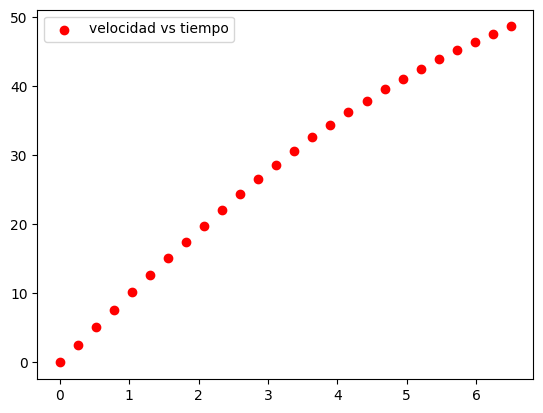

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f,a,b,n,x0):
  w = np.zeros(n+1,float)
  w[0] = x0
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  for i in range(n):
    w[i+1] = w[i] + h*f(t[i],w[i])
  return w
cd = 0.225
g = 9.81
m = 90
f = lambda t,v: g - (cd/m)*v**2
a = 0
b = 6.5 #tiempo t que gustes
n = 25
x0 = 0
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
w = euler(f,a,b,n,x0)

plt.scatter(t,w, c = 'red',label = 'velocidad vs tiempo')
plt.legend()

for i in range(n+1):
  print("tiempo = ", t[i], "velocidad = ", w[i])


$$\dfrac{dr}{dt} = v$$
$$ d_{i+1}-d_i ≈ v_i *t $$
$$ d_{i+1} = d_i + t*v_i $$

Runge Kuta $p=2$ donde: $a = 1-b, \alpha = \beta = 1/2b$.

In [ ]:
import numpy as np
def RK2(f,a,b,n,x0,v):
  u = np.zeros(n+1,float)
  u[0] = x0
  t = np.linspace(a,b,n+1)
  alfa = 1/(2*v)
  beta = 1/(2*v)
  A = 1-v
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+alfa*h,u[i]+beta*K1*h)
    u[i+1] = u[i] + h*(A*K1+v*K2)
  return u

f = lambda t,y: y-t**2+1
a = 0
b = 2
n = 10
x0 = 0.5
v = 0.3
RK2(f,a,b,n,x0,v)

#obs: v = 1/2 => método de euler modificado
#v = 1 => método del punto medio

5.156634855454891

In [ ]:
#RUNGE KUTA 3:
import numpy as np

def RK3(f,a,b,n,x0):
  u=x0
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n)])
  for i in range(n):
    K1 = f(t[i],u)
    K2 = f(t[i]+h/3,u+K1*h/3)
    K3 = f(t[i]+2*h/3,u+2*K2*h/3)
    u+= (h/4)*(K1+3*K3)
  return u

f = lambda t,y: y-t**2+1
a = 0
b = 2
n = 10
x0 = 0.5
v = 0.3
RK3(f,a,b,n,x0)

5.305007192434419

tiempo =  0.0 velocidad =  0.0
tiempo =  0.84 velocidad =  -8.193173086684546
tiempo =  1.68 velocidad =  -16.11073293065709
tiempo =  2.52 velocidad =  -23.51294396183519
tiempo =  3.36 velocidad =  -30.222340452333494
tiempo =  4.2 velocidad =  -36.135214694781496
tiempo =  5.04 velocidad =  -41.218430647312765
tiempo =  5.88 velocidad =  -45.49602246322547
tiempo =  6.72 velocidad =  -49.03142352040488
tiempo =  7.56 velocidad =  -51.91017268741814
tiempo =  8.4 velocidad =  -54.22591454617809
tiempo =  9.24 velocidad =  -56.070611975078464
tiempo =  10.08 velocidad =  -57.528654880728574
tiempo =  10.92 velocidad =  -58.673993822116906
tiempo =  11.76 velocidad =  -59.56933806232007
tiempo =  12.6 velocidad =  -60.26660257614586
tiempo =  13.44 velocidad =  -60.808005709230784
tiempo =  14.28 velocidad =  -61.22742308375617
tiempo =  15.12 velocidad =  -61.55176202116254
tiempo =  15.959999999999999 velocidad =  -61.802230969995954
tiempo =  16.8 velocidad =  -61.9954486779851
tiem

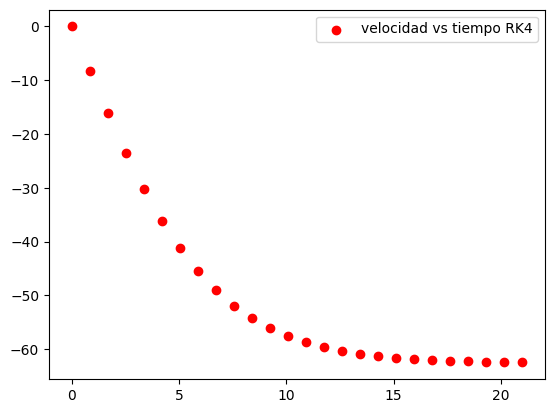

In [ ]:
#RUNGE KUTA 4:
import numpy as np
import matplotlib.pyplot as plt

def RK4(f,a,b,n,x0):
  u = np.zeros(n+1,float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

cd = 0.225
g = 9.81
m = 90
f = lambda t,v: -(g - (cd/m)*v**2)
a = 0
b = 21 #tiempo t que gustes
n = 25
x0 = 0
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
w = RK4(f,a,b,n,x0)

plt.scatter(t,w, c = 'red',label = 'velocidad vs tiempo RK4')
plt.legend()

for i in range(n+1):
  print("tiempo = ", t[i], "velocidad = ", w[i])

In [ ]:
#predictor corrector:

import numpy as np

def predictor_corrector(f,a,b,n,x0):
  u = np.zeros(n+1)
  u[0]=x0
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n)])
  for i in range(n-1):
    u[i+1]= u[i] + h*f(t[i],u[i])
    u[i+1] = u[i] + (h/2)*(f(t[i],u[i])+f(t[i+1],u[i+1]))
  return u[n-1]

f = lambda t,y: t*y
a = 0
b = 2
n = 10000
x0 = 1
print("actual number: ", np.exp(2))
print("aprox: ", predictor_corrector(f,a,b,n,x0))
print("error: ", np.abs(predictor_corrector(f,a,b,n,x0) - np.exp(2)))

actual number:  7.38905609893065
aprox:  7.386101018407264
error:  0.002955080523386222


In [ ]:
#AB 2 PASOS: u[k+1]=u[k]+h*(3*eval(u[k],tt[k],f)-eval(u[k-1],tt[k-1],f))/2
#AB 3 PASOS: u[k+1]=u[k]+h*(5*eval(u[k-2],tt[k-2],f)-16*eval(u[k-1],tt[k-1],f)+23*eval(u[k],tt[k],f))/12
#AB 4 PASOS: u[k+1]=u[k]+h*(-9*eval(u[k-3],tt[k-3],f)+37*eval(u[k-2],tt[k-2],f)-59*eval(u[k-1],tt[k-1],f)+55*eval(u[k],tt[k],f))/24
#AM 2 PASOS:
  #u[k+1]=u[k]+h*(3*eval(u[k], tt[k], f) - eval(u[k - 1], tt[k - 1], f)) / 2
  #u[k+1]=u[k]+h*(-eval(u[k-1],tt[k-1],f)+8*eval(u[k],tt[k],f)+5*eval(u[k+1],tt[k+1],f))/12
#AM 3 PASOS:
  #u[k+1]=u[k]+h*(5*eval(u[k-2],tt[k-2],f)-16*eval(u[k-1],tt[k-1],f)+23*eval(u[k],tt[k],f))/12
  #u[k+1]=u[k]+h*(eval(u[k-2],tt[k-2],f)-5*eval(u[k-1],tt[k-1],f)+19*eval(u[k],tt[k],f)+9*eval(u[k+1],tt[k+1],f))/24

In [ ]:
#ADAM BASHFORD N = 3
import numpy as np

def AB3(f,a,b,n,x0):
  A = 41/24
  B = -7/6
  C = 11/24
  h = (b-a)/n
  u = np.zeros(n+1)
  t = np.array([a+i*h for i in range(n)])
  u[0]=x0
  u[1]= u[0]+A*h*f(t[0],u[0])
  u[2]= u[1]+A*h*f(t[1],u[1]) + B*h*f(t[0],u[0])
  for i in range(2,n-1):
    u[i+1] = u[i] + h* (  A*f(t[i],u[i]) + B*f(t[i-1],u[i-1]) + C*f(t[i-2], u[i-2])  )
  return u[n-1]

f = lambda t,y: t*y
a = 0
b = 2
n = 10000
x0 = 1
print("actual number: ", np.exp(2))
print("aprox: ", AB3(f,a,b,n,x0))
print("error: ", np.abs(AB3(f,a,b,n,x0) - np.exp(2)))


actual number:  7.38905609893065
aprox:  7.384379394262549
error:  0.00467670466810155


$-u''(x) = f(x), u(0)=A, u(L)=B, 0\leq x \leq L$.

----------------------------------------
u         valor exacto           error
----------------------------------------
-0.00001984 -0.00000000      0.00001984
-0.00003968 -0.00002083      0.00001885
-0.00018452 -0.00016667      0.00001786
-0.00057937 -0.00056250      0.00001687
-0.00134921 -0.00133333      0.00001587
-0.00261905 -0.00260417      0.00001488
-0.00451389 -0.00450000      0.00001389
-0.00715873 -0.00714583      0.00001290
-0.01067857 -0.01066667      0.00001190
-0.01519841 -0.01518750      0.00001091
-0.02084325 -0.02083333      0.00000992
-0.02773810 -0.02772917      0.00000893
-0.03600794 -0.03600000      0.00000794
-0.04577778 -0.04577083      0.00000694
-0.05717262 -0.05716667      0.00000595
-0.07031746 -0.07031250      0.00000496
-0.08533730 -0.08533333      0.00000397
-0.10235714 -0.10235417      0.00000298
-0.12150198 -0.12150000      0.00000198
-0.14289683 -0.14289583      0.00000099
[-1.98412698e-05 -3.96825397e-05 -1.84523810e-04 -5.79365079e-04
 -1.34920635e-

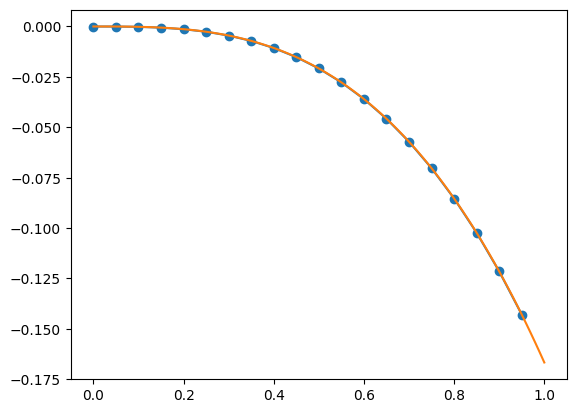

In [3]:
#primer algoritmo angelito dirichlet
import numpy as np
import matplotlib.pyplot as plt

def angelito_u(f,n,A,B,L,delimiter):
  Q = np.zeros((n,n),float)
  for i in range(n):
    Q[i][i]=2
    if i<(n-1):
      Q[i+1][i]=-1
      Q[i][i+1]=-1
  h = L/n
  x = np.array([i*h for i in range(n)])
  b = np.array(np.zeros(n,float))
  for i in range(n):
    b[i]=h**2*f(x[i])
  b[0] += A
  b[n-1] += B
  u = np.linalg.solve(Q,b)
  dash = '-'*40
  if delimiter == True:
    for i in range(n):
      if i==0:
        print(dash)
        print('{:<10s}{:>12s}{:>16s}'.format("u", "valor exacto","error"))
        print(dash)
      print('{:<10.8f}{:>12.8f}{:>16.8f}'.format(u[i],g(x[i]),np.abs(u[i]-g(x[i]))))
      #print(u[i],"  ",g(x[i]),"  ",c[i])
  return u

g= lambda x: -x**3/6
f = lambda x: x
A = 0
B = -1/6
L = 1
n = 20
h = L/n
X = np.array([i*h for i in range(n)])
Y = angelito_u(f,n,A,B,L,True)
XX = np.linspace(0,1,100)
Z = g(XX)
plt.scatter(X,Y)
plt.plot(X,Y)
plt.plot(XX,Z)
print(Y)
print(Y[1:-1])

$$\begin{cases}
-u''(x) = f(x) & 0\leq x\leq L\\
u(0)=A \\
u'(L)=B
\end{cases}$$

----------------------------------------
       u        valor exacto       error     
----------------------------------------
  -0.02625000    -0.00000000    0.02625000   
  -0.05250000    -0.00002083    0.05247917   
  -0.07887500    -0.00016667    0.07870833   
  -0.10550000    -0.00056250    0.10493750   
  -0.13250000    -0.00133333    0.13116667   
  -0.16000000    -0.00260417    0.15739583   
  -0.18812500    -0.00450000    0.18362500   
  -0.21700000    -0.00714583    0.20985417   
  -0.24675000    -0.01066667    0.23608333   
  -0.27750000    -0.01518750    0.26231250   
  -0.30937500    -0.02083333    0.28854167   
  -0.34250000    -0.02772917    0.31477083   
  -0.37700000    -0.03600000    0.34100000   
  -0.41300000    -0.04577083    0.36722917   
  -0.45062500    -0.05716667    0.39345833   
  -0.49000000    -0.07031250    0.41968750   
  -0.53125000    -0.08533333    0.44591667   
  -0.57450000    -0.10235417    0.47214583   
  -0.61987500    -0.12150000    0.49837500  

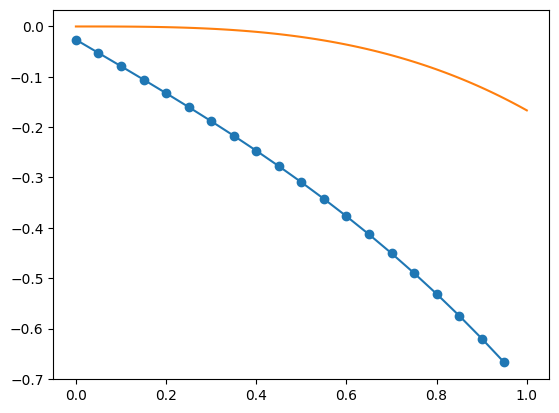

In [ ]:
#segundo algoritmo angelito dirichlet-von newman
import numpy as np
import matplotlib.pyplot as plt

def angel_diri_newman(f,n,L,A,B,delimiter):
  Q = np.zeros((n,n),float)
  for i in range(n):
    Q[i][i]=2
    if i<(n-1):
      Q[i+1][i]=-1
      Q[i][i+1]=-1
    else:
      Q[i][i]=1
  h = L/n
  x = np.array([i*h for i in range(n)])
  b = np.array(np.zeros(n,float))
  for i in range(n):
    b[i]=h**2*f(x[i])
  b[0] = b[0]+ A
  b[n-1] = b[n-1] + h*B
  u = np.linalg.solve(Q,b)
  dash = '-'*40
  if delimiter == True:
    for i in range(n):
      if i==0:
        print(dash)
        print('{:^15s}{:^15s}{:^15s}'.format("u", "valor exacto","error"))
        print(dash)
      print('{:^15.8f}{:^15.8f}{:^15.8f}'.format(u[i],g(x[i]),np.abs(u[i]-g(x[i]))))
      #print(u[i],"  ",g(x[i]),"  ",c[i])
  return u


g= lambda x: -x**3/6
f = lambda x: x
A = 0
B = -0.5
L = 1
n = 20
h = L/n
X = np.array([i*h for i in range(n)])
Y = angel_diri_newman(f,n,L,A,B,True)
XX = np.linspace(0,1,100)
Z = g(XX)
plt.scatter(X,Y)
plt.plot(X,Y)
plt.plot(XX,Z)

In [ ]:
#RUNGE KUTA EN VARIAS VARIABLES 4:
import numpy as np
import matplotlib.pyplot as plt

def RK4(f,a,b,n,x0,dim):
  u = np.zeros((n+1,dim),float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n-1):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

f = lambda t,y: np.array([2*t*y[1], -2*t*y[0]])
a = 0
b = 1
x0 = np.array([0.0,1.0])
n = 8
print(RK4(f,a,b,n,x0,2))
#PARA DETECTAR ERRORES EN CASO DE CONOCER SOLUCIÓN EXACTA:
g = lambda t: np.array([np.sin(t**2), np.cos(t**2)])
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
print("error por coordenada:")
for i in range(n):
  print("coordenada", i+1, ": ", np.linalg.norm(np.transpose(g(t))[i] - RK4(f,a,b,n,x0,2)[i]))

[[0.         1.        ]
 [0.01562436 0.99987793]
 [0.06245932 0.99804749]
 [0.14016194 0.9901285 ]
 [0.24740377 0.96891224]
 [0.38076571 0.92467104]
 [0.53330069 0.84592463]
 [0.6929832  0.72095117]
 [0.         0.        ]]
error por coordenada:
coordenada 1 :  0.0
coordenada 2 :  2.4835187491030837e-09
coordenada 3 :  2.4897214871312296e-08
coordenada 4 :  9.063151913335944e-08
coordenada 5 :  2.600607431854836e-07
coordenada 6 :  7.364010330983697e-07
coordenada 7 :  1.989562702803756e-06
coordenada 8 :  4.866741749152584e-06


Método del disparo.
$\begin{cases}
    y'' = p(x)y' + q(x)y +r(x), & a \leq x \leq b\\
    y(a) = \alpha\\
    y(b) = \beta
\end{cases}$

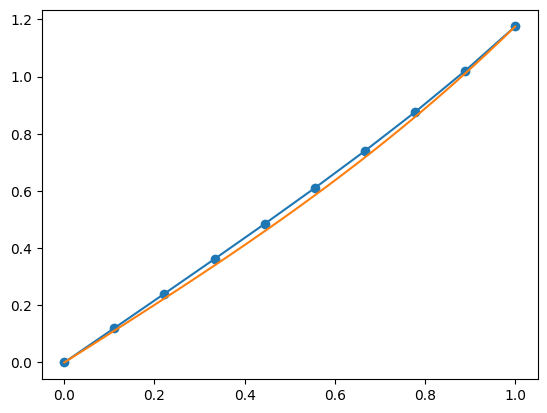

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#resuelve Y' = F(X,Y), con x \in \R y Y\in \R^n
def RK4(f,a,b,n,x0,dim):
  u = np.zeros((n+1,dim),float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

def disparo(p,q,r,a,alfa,b,beta,n):
  f = lambda x,z: np.array([z[1],
                            q(x)*z[0]+p(x)*z[1]+r(x),
                            z[3],
                            q(x)*z[2]+p(x)*z[3]+r(x)])
  z0 = np.array([alfa,0,0,1])
  Z = RK4(f,a,b,n,z0,4)
  y1 = np.transpose(Z)[0]
  y2 = np.transpose(Z)[2]
  Y = y1 + ((beta - y1[n])/y2[n])*y2
  return Y

#y'' = 4y, y(0)=0,y(1)=sinh 2
# => y= 0.5e**2x - e**-2x = sinh(2x)
p = lambda x: 0
q = lambda x: x
r = lambda x: 0
a = 0
alfa =0
b = 1
beta = np.sinh(1)
n = 9
U = disparo(p,q,r,a,alfa,b,beta,n)
h = (b-a)/n
#print(U[-1])
t = np.array([a+i*h for i in range(n+1)])
plt.scatter(t,U)
plt.plot(t,U)
#VERIFICANDO CON SOLUCIÓN EXACTA:
g = lambda x: np.sinh(x)
X = np.linspace(a,b,30)
plt.plot(X,g(X))

Valor de y discretizado en [a,b]: [0.         0.12190286 0.24382498 0.36581591 0.4879583  0.61036805
 0.73319456 0.85662127 0.98086628 1.10618336 1.23286327 1.3612354
 1.49166999 1.62458079 1.76042832 1.89972393 2.04303459 2.19098869
 2.34428296 2.5036907  2.67007153 2.84438306 3.0276947  3.22120409
 3.42625676 3.64436956 3.87725885 4.12687436 4.39544016 4.68550437
 4.99999987]
Valor de y' discretizado en [a,b]: [3.65704441 3.65720953 3.65836542 3.66150377 3.66761916 3.67771244
 3.69279549 3.71389734 3.74207179 3.77840655 3.8240341  3.88014433
 3.94799927 4.02895018 4.12445728 4.23611268 4.36566703 4.51506061
 4.68645972 4.88229956 5.10533484 5.35870006 5.64598148 5.97130356
 6.33943341 6.75590776 7.2271879  7.76085036 8.36582242 9.05267537
 9.83399162]


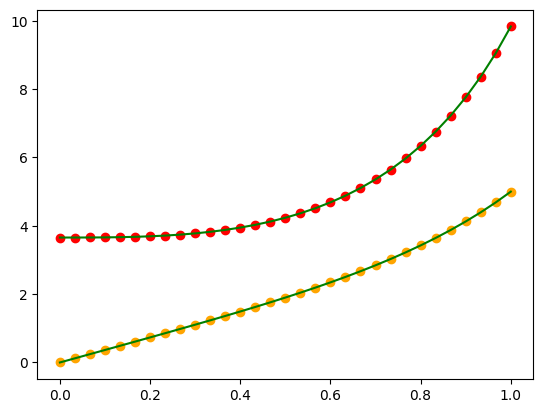

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

def RK4(f,a,b,n,x0,dim):
  u = np.zeros((n+1,dim),float)
  h = (b-a)/n
  t = np.array([a+i*h for i in range(n+1)])
  u[0]=x0
  for i in range(n):
    K1 = f(t[i],u[i])
    K2 = f(t[i]+h/2,u[i]+K1*h/2)
    K3 = f(t[i]+h/2,u[i]+K2*h/2)
    K4 = f(t[i]+h,u[i]+h*K3)
    u[i+1]= u[i] + (h/6)*(K1+2*K2+2*K3+K4)
  return u

def falsePosition(f,x0,x1,tol):
    i = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2
        i+=1
        condition = abs(f(x2)) > tol
    return x2

#toma y'' = f(x,y,y'), y(a) = alfa, y'(a) = beta
#plotea discretización de y en [a,b]
def pseudo_code(f,a,b,alfa,beta,n):
  F = lambda x,u: np.array([u[1],f(x,u[0],u[1])])
  x0 = np.array([alfa,beta])
  dim = 2
  u = RK4(F,a,b,n,x0,dim)
  #u^t[0] comportamiento de y discretizado
  #u^t[0][-1] = y(b)
  #u^t[1] comportamiento de y' discretizado
  #u^t[1][-1] = y'(b)
  return np.transpose(u)

def disparo_no_lineal(f,a,b,alfa,beta,n,tol):
  y = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[0][-1]
  y_d = lambda x,M: pseudo_code(f,a,x,alfa,M,n)[1][-1]
  #testeo de que y y y_d están correctos:
  #X = np.linspace(a,b,n+1)
  #for M in [-2,-1,0,1,2]:
  #  plt.scatter(X,y(b,M))
  #  plt.scatter(X,y_d(b,M))
  #plt.plot(X,np.sinh(X))
  #plt.plot(X,np.cosh(X))
  F = lambda M: y(b,M) - beta
  M0 = -2
  M1 = 2
  M = falsePosition(F,M0,M1,tol)
  return pseudo_code(f,a,b,alfa,M,n)

#testeando
# y'' = f(x,y,y')
# y(a) = alfa
# y(b) = beta

f = lambda x,y,z: y**2
a = 0
alfa = 0
b = 1
beta = 5
n = 30
u = disparo_no_lineal(f,a,b,alfa,beta,n,1e-6)
h = (b-a)/n
t = np.array([a+i*h for i in range(n+1)])
plt.scatter(t,u[0], c = 'orange')
plt.scatter(t,u[1], c = 'red')
plt.plot(t,u[0], c = 'green')
plt.plot(t,u[1], c = 'green')

#in case of knowing the exact solution:
#X = np.linspace(a,b,100)
#plt.plot(X,np.sinh(X))
#plt.plot(X,np.cosh(X))
plt.show()